Decision Trees & Random Forests




We are going to predict once again if a passenger on the Titanic is going to survive. This time  using decision trees and random forests: 

1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(at least two parameters). 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use a random forest then change the number of estimators.

6. Calculate the new accuracy and compare it with the previous result.
 

In [1]:
# Import modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing our dataset from csv file
import pandas as pd 
# dataset=pd.read_csv("../data/titanic-passengers.csv", sep=";")
dataset = pd.read_csv('/content/drive/MyDrive/data_set/data_titanic.csv', header='infer')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data['Embarked'].fillna('S',inplace=True)
    new_data.replace({'Embarked':{'S': 0,'C':1,'Q':2}},inplace=True)
    
    return new_data

In [7]:
data=preprocess_data(dataset)

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,G6,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,G6,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,G6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,G6,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,G6,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1


In [9]:
data['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

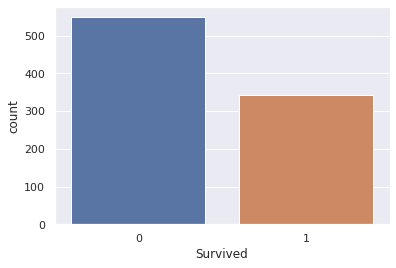

In [10]:
sns.countplot(x='Survived', data=data);

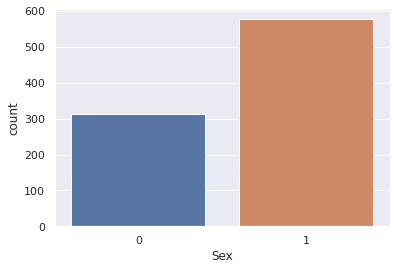

In [11]:
sns.countplot(x='Sex', data=data);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


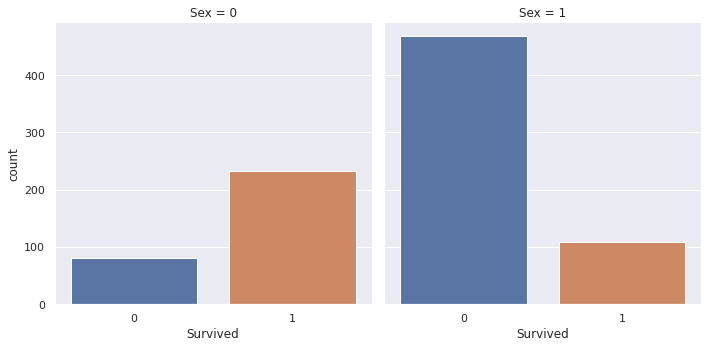

In [12]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=data);

Women were more likely to survive than men.

In [13]:
dataset.groupby(['Sex']).Survived.sum()

Sex
0    233
1    109
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


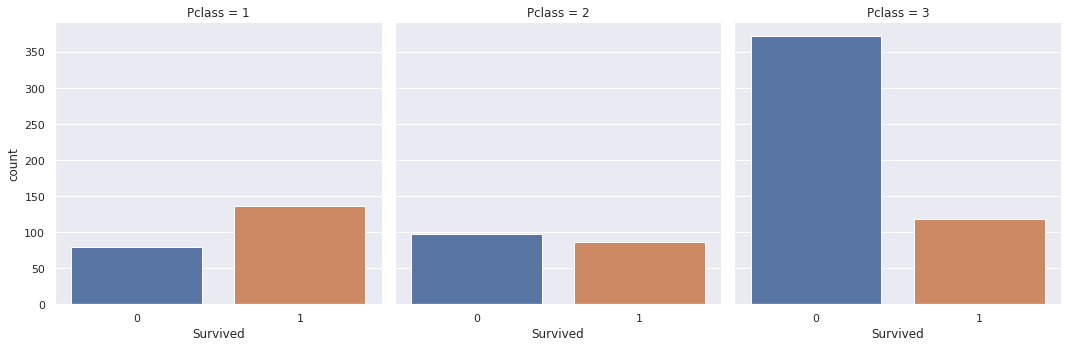

In [14]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=data);

Passengers that travelled in first class were more likely to survive. On the other hand, passengers travelling in third class were more unlikely to survive.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


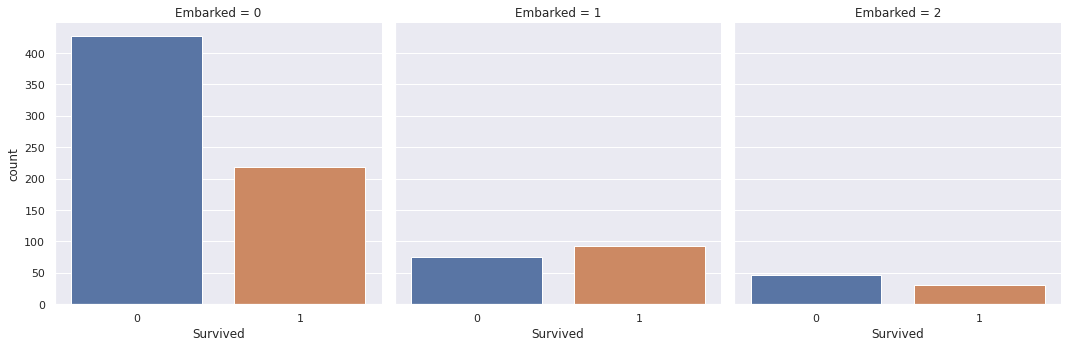

In [15]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=data);

Passengers that embarked in Southampton were less likely to survive

In [16]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7541899441340782


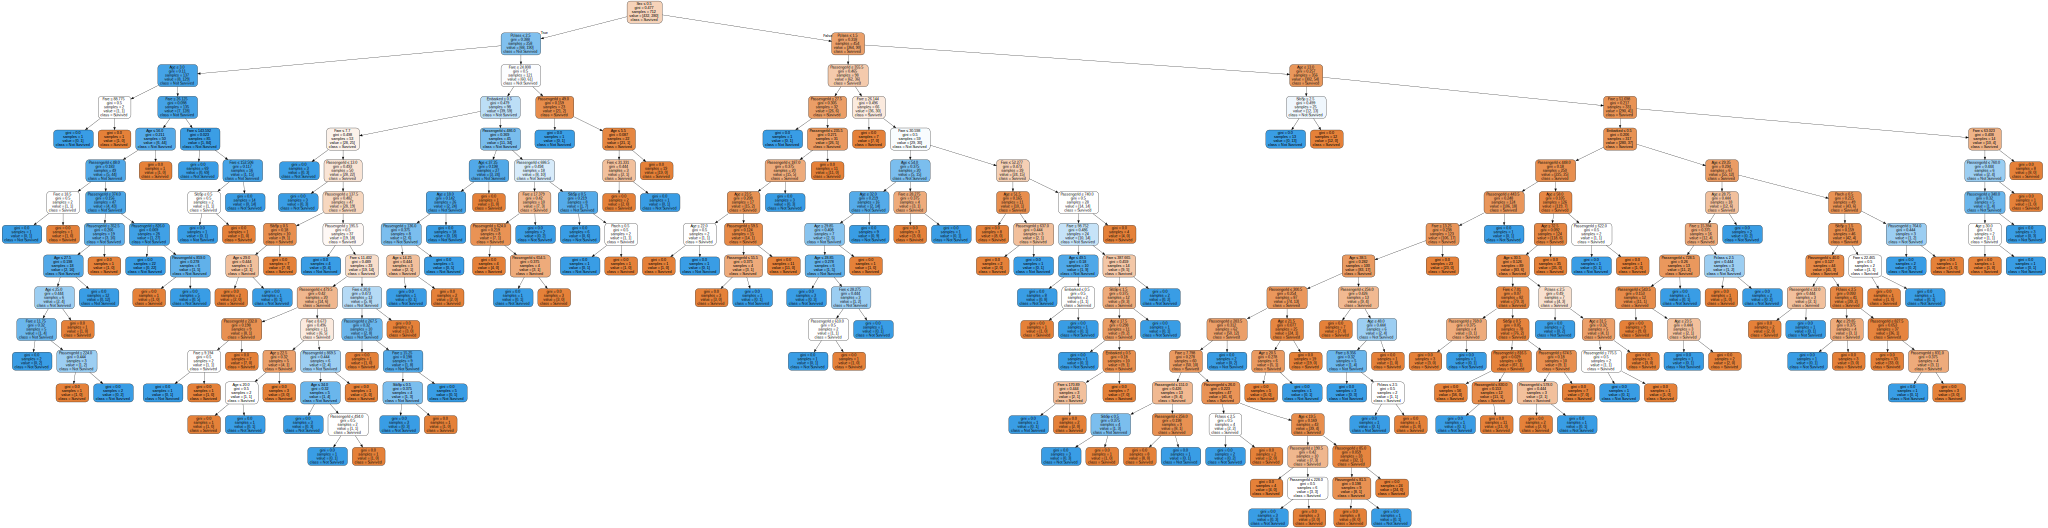

In [24]:

import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("Titanic") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=data.drop(["Survived", "Name", "Cabin", "Ticket"], axis=1).columns.values,  
                         class_names=['Survived','Not Survived'],  
                      filled=True, rounded=True,  
                         special_characters=True) 

graph = graphviz.Source(dot_data)  
graph 


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=1234)

In [47]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

In [48]:
# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)

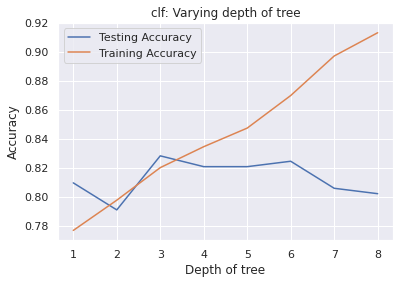

In [49]:
# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [50]:
#applying tree algorithm
clf = tree.DecisionTreeClassifier(max_depth=3)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8283582089552238


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=56)
#applying tree algorithm
clf = tree.DecisionTreeClassifier(max_depth=3, splitter='random', max_leaf_nodes=150, min_samples_leaf=35)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8171641791044776


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=56)
#applying tree algorithm
clf = tree.DecisionTreeClassifier(max_depth=3, splitter='random', max_leaf_nodes=150, min_samples_leaf=35)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8491620111731844


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=56)
#applying tree algorithm
clf = tree.DecisionTreeClassifier(max_depth=3, splitter='random', max_leaf_nodes=65, min_samples_leaf=65)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8715083798882681


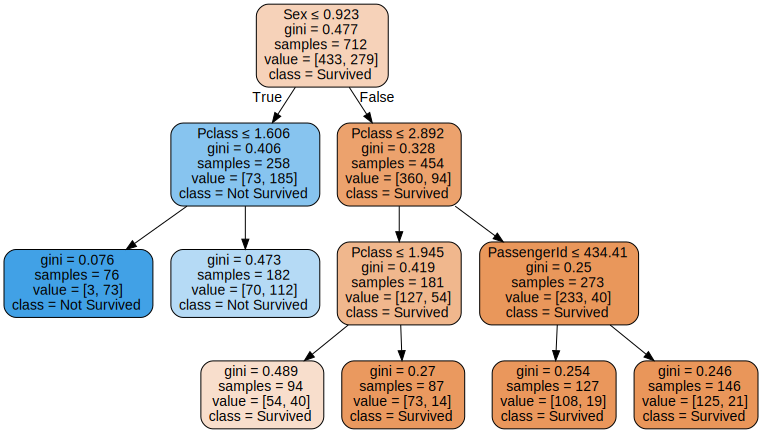

In [80]:

import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("Titanic") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=data.drop(["Survived", "Name", "Cabin", "Ticket"], axis=1).columns.values,  
                         class_names=['Survived','Not Survived'],  
                      filled=True, rounded=True,  
                         special_characters=True) 

graph = graphviz.Source(dot_data)  
graph 

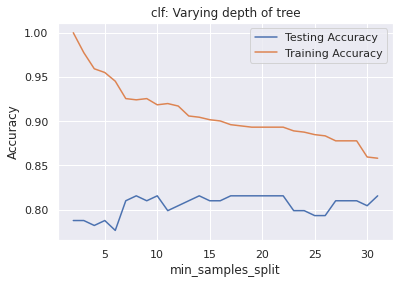

In [84]:
# Setup arrays to store train and test accuracies
dep = np.arange(2, 32)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))
# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(min_samples_split=k)

    # Fit the classifier to the training data
    clf.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)


# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.show()

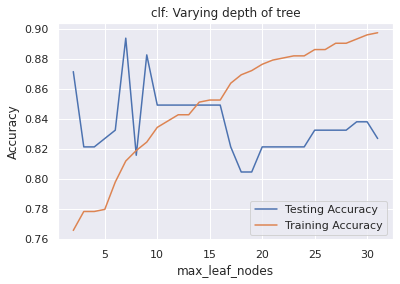

In [85]:
# Setup arrays to store train and test accuracies
dep = np.arange(2, 32)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))
# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=k)

    # Fit the classifier to the training data
    clf.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)


# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.show()

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=56)
#applying tree algorithm
clf = tree.DecisionTreeClassifier(max_depth=3, splitter='best', max_leaf_nodes=6, min_samples_leaf=5)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.888268156424581


The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

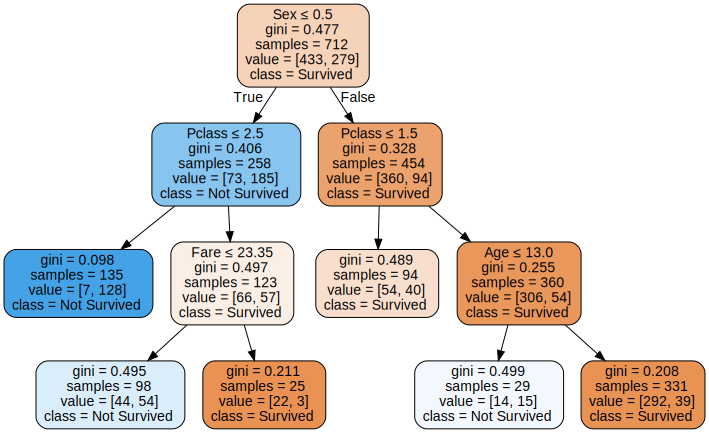

In [105]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=data.drop(["Survived", "Name", "Cabin", "Ticket"], axis=1).columns.values,  
                         class_names=['Survived','Not Survived'],  
                      filled=True, rounded=True,  
                         special_characters=True) 

graph = graphviz.Source(dot_data)  
graph 

# Random Forest 

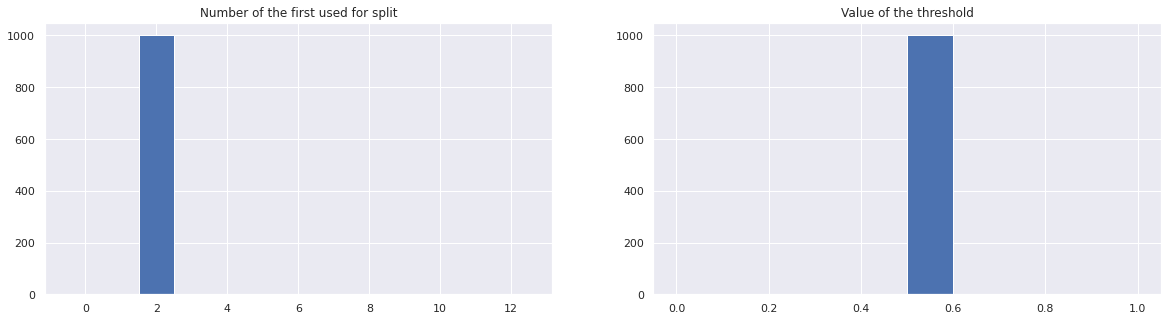

In [128]:
# Feature selected first and threshold

features = []
tresholds = []
for random in range(1000):
    clf = DecisionTreeClassifier(criterion="gini", splitter='best', random_state=random)
    clf.fit(x_train, y_train)   #fitting our model
    features.append(clf.tree_.feature[0])
    tresholds.append(clf.tree_.threshold[0])

# plot distribution
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax.hist(features, bins=np.arange(14)-0.5)
ax2.hist(tresholds)
ax.set_title("Number of the first used for split")
ax2.set_title("Value of the threshold")
plt.show()

In [129]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=56)
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8212290502793296


In [142]:
from sklearn.tree import export_graphviz
from six import StringIO 
import pydotplus
from pydotplus import graph_from_dot_data
from keras.preprocessing import image
i_tree = 0
dot_data = StringIO()
for tree_in_forest in clf.estimators_:#rfc random forest classifier
    if (i_tree ==3):        
        export_graphviz(tree_in_forest, out_file=dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())   
        graph.create_jpg
    i_tree = i_tree + 1


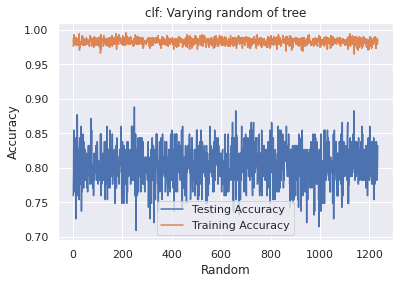

In [143]:
# Setup arrays to store train and test accuracies
dep = np.arange(2, 1234)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))
# Loop over different values of k
for i, k in enumerate(dep):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=k)
    clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees


    # Fit the classifier to the training data
    clf.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)
    


# Generate plot
plt.title('clf: Varying random of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Random')
plt.ylabel('Accuracy')
plt.show()

In [144]:
print(test_accuracy.max())

0.888268156424581


In [170]:
#test_accuracy.index(max(test_accuracy))
for i, k in enumerate(dep):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=k)
    clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees


    # Fit the classifier to the training data
    clf.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)
    if test_accuracy[i]==test_accuracy.max():
      print(k)

1058


In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=56)
clf=RandomForestClassifier(n_estimators=4, random_state=1234)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8491620111731844


In [175]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=822569775),
 DecisionTreeClassifier(max_features='auto', random_state=2137449171),
 DecisionTreeClassifier(max_features='auto', random_state=524453158),
 DecisionTreeClassifier(max_features='auto', random_state=1365105717),
 DecisionTreeClassifier(max_features='auto', random_state=1880026316),
 DecisionTreeClassifier(max_features='auto', random_state=481516916),
 DecisionTreeClassifier(max_features='auto', random_state=1225605784),
 DecisionTreeClassifier(max_features='auto', random_state=1165481977),
 DecisionTreeClassifier(max_features='auto', random_state=1202486927),
 DecisionTreeClassifier(max_features='auto', random_state=1549064881),
 DecisionTreeClassifier(max_features='auto', random_state=1170776343),
 DecisionTreeClassifier(max_features='auto', random_state=646980841),
 DecisionTreeClassifier(max_features='auto', random_state=1187404954),
 DecisionTreeClassifier(max_features='auto', random_state=852631582),
 DecisionTr

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1058)
clf=RandomForestClassifier(n_estimators=260, random_state=1058)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the acc

Accuracy: 0.8715083798882681


In [188]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1058)
clf=RandomForestClassifier(n_estimators=250, random_state=1058)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the acc

Accuracy: 0.8770949720670391


In [196]:

from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(x_train, y_train)
print(CV_clf.best_params_)

{'max_features': 'log2', 'n_estimators': 700}


In [198]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1058)
clf=RandomForestClassifier(n_estimators=700,max_features= 'log2', random_state=1058)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the acc

Accuracy: 0.888268156424581


max_features


The number of features to consider when looking for the best split:


If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.